# API-Driven Data Cleaning for Real-World Data

In [1]:
import pandas as pd
from google.colab import drive
import re

In [2]:
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/News API datasets/merged-csv-files.csv')

Mounted at /content/drive


In [5]:
#Reading the data
df.head(20)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Victoria Barrios,The Verge is nominated for two Webby Awards — ...,The time of year has arrived â Webby Award s...,https://www.theverge.com/video/646816/webby-no...,https://platform.theverge.com/wp-content/uploa...,2025-04-11T15:00:43Z,Voting for the Peoples Voice Award ends on Apr...
1,"{'id': None, 'name': 'Makezine.com'}",Dale Dougherty,Fun With Technology,The power of makers and making is in battling ...,https://makezine.com/article/maker-news/maker-...,https://makezine.com/wp-content/uploads/2025/0...,2025-04-11T16:00:00Z,This is a recording of the keynote talk I gave...
2,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,Watch this ultra-detailed animation of the sea...,The world has a more detailed map of the seafl...,https://www.theverge.com/nasa/634086/ocean-flo...,https://platform.theverge.com/wp-content/uploa...,2025-03-21T20:15:18Z,A NASA and CNES satellite lets scientists see ...
3,"{'id': 'the-verge', 'name': 'The Verge'}","Jay Peters, Andrew Webster",7 cool indie games from GDC 2025,"The Game Developers Conference, an annual gath...",https://www.theverge.com/games/633885/gdc-2025...,https://platform.theverge.com/wp-content/uploa...,2025-03-21T17:12:34Z,"The Game Developers Conference, an annual gath..."
4,"{'id': 'the-verge', 'name': 'The Verge'}",Andrew J. Hawkins,The Nissan Leaf lives on as a compact SUV with...,"The Nissan Leaf is back, and it’s not a frumpy...",https://www.theverge.com/news/636386/nissan-le...,https://platform.theverge.com/wp-content/uploa...,2025-03-26T14:58:17Z,The rumors of my demise were greatly exaggerat...
5,"{'id': 'the-verge', 'name': 'The Verge'}",Kylie Robison,All of the updates about OpenAI,What was once a humble research lab has transf...,https://www.theverge.com/news/640086/openai-ch...,https://platform.theverge.com/wp-content/uploa...,2025-04-01T19:49:20Z,What was once a humble research lab has transf...
6,"{'id': 'the-verge', 'name': 'The Verge'}",Jess Weatherbed,US expands export blacklist to keep computing ...,The US has added 80 organizations and companie...,https://www.theverge.com/news/636277/us-chines...,https://platform.theverge.com/wp-content/uploa...,2025-03-26T13:37:26Z,The Trump administration is imposing more rest...
7,"{'id': 'the-verge', 'name': 'The Verge'}",Emma Roth,NFL swaps first-down chains for Sony’s 8K cameras,"Starting with this year’s football season, the...",https://www.theverge.com/news/640890/nfl-sony-...,https://platform.theverge.com/wp-content/uploa...,2025-04-01T19:06:57Z,"This season, the NFL will use Sonys Hawk-Eye c..."
8,"{'id': 'the-verge', 'name': 'The Verge'}",Verge Staff,The modifiers,Technology doesn’t need to die. So much of our...,https://www.theverge.com/creators/638649/small...,https://platform.theverge.com/wp-content/uploa...,2025-04-08T14:44:13Z,Technology doesn’t need to die. So much of our...
9,"{'id': 'the-verge', 'name': 'The Verge'}",Andrew Webster,Black Mirror season 7 tugs at your heartstring...,"Black Mirror started out as a grim, dark, and ...",https://www.theverge.com/tv-reviews/646271/bla...,https://platform.theverge.com/wp-content/uploa...,2025-04-10T12:46:04Z,Black Mirror season 7 tugs at your heartstring...


As we can see the above data consists of noises and inconsistencies. so lets solve the issue column by column

In [6]:
#Checking the source column
df["source"].unique()

array(["{'id': 'the-verge', 'name': 'The Verge'}",
       "{'id': None, 'name': 'Makezine.com'}",
       "{'id': None, 'name': 'MacRumors'}",
       "{'id': 'business-insider', 'name': 'Business Insider'}",
       "{'id': 'wired', 'name': 'Wired'}",
       "{'id': None, 'name': 'Android Central'}",
       "{'id': None, 'name': 'Gizmodo.com'}",
       "{'id': None, 'name': 'CNET'}",
       "{'id': 'the-next-web', 'name': 'The Next Web'}",
       "{'id': None, 'name': 'NPR'}",
       "{'id': None, 'name': 'VentureBeat'}",
       "{'id': None, 'name': 'Yahoo Entertainment'}",
       "{'id': None, 'name': 'Slashdot.org'}",
       "{'id': None, 'name': 'Interesting Engineering'}",
       'end of first excel', 'source', "{'id': None, 'name': 'BBC News'}",
       "{'id': None, 'name': 'Hackaday'}",
       "{'id': None, 'name': 'Seths.blog'}",
       "{'id': None, 'name': 'Cerncourier.com'}",
       "{'id': None, 'name': 'Scientific American'}",
       "{'id': None, 'name': 'Cuanschutz.edu'}",

In [7]:
# Clean 'source' column
import ast  # To parse dictionaries

def extract_source_name(source_str):
    try:
        # Replace single quotes with double quotes for valid JSON
        source_dict = ast.literal_eval(source_str.replace("'", '"'))
        return source_dict.get("name", "Unknown Source")
    except:
        return "Unknown Source"

df["source_name"] = df["source"].apply(extract_source_name)
df.drop(columns=["source"], inplace=True)  # Drop original messy column

In [8]:
df["source_name"]

,source_name
0,The Verge
1,Makezine.com
2,The Verge
3,The Verge
4,The Verge
...,...
453,BBC News
454,Github.com
455,BBC News
456,Unknown Source


In [9]:
#Checking the author column

# Strip whitespace and standardize case
df["author"] = df["author"].str.strip().str.title()

# Replace empty/missing authors with "Unknown"
df["author"].fillna("Unknown", inplace=True)

<ipython-input-9-e70d8b99adb9>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["author"].fillna("Unknown", inplace=True)


In [10]:
df["author"]

,author
0,Victoria Barrios
1,Dale Dougherty
2,Justine Calma
3,"Jay Peters, Andrew Webster"
4,Andrew J. Hawkins
...,...
453,Barra Best - Bbc News Ni Weather Presenter
454,Simonw
455,Unknown
456,Unknown


In [11]:
#The title, description and content column consists of the same type of noises hence handling all 3 columns at once


# Helper function to clean text columns
def clean_text(text):
    if pd.isna(text):
        return ""
    # Remove HTML tags
    text = re.sub(r"<.*?>", "", text)
    # Remove truncation markers
    text = re.sub(r"\[+\d+ chars\]", "", text)
    # Fix encoding issues (e.g., "â" → empty space)
    text = text.encode("ascii", "ignore").decode("utf-8")
    return text.strip()

# Apply to relevant columns
text_columns = ["title", "description", "content"]
for col in text_columns:
    df[col] = df[col].apply(clean_text)

In [12]:
df["title"]

,title
0,The Verge is nominated for two Webby Awards h...
1,Fun With Technology
2,Watch this ultra-detailed animation of the sea...
3,7 cool indie games from GDC 2025
4,The Nissan Leaf lives on as a compact SUV with...
...,...
453,Amber wildfire warning issued as dry weather c...
454,LLM-hacker-news: LLM plugin for pulling conten...
455,'Perfect explosive mixture' was flagged years ...
456,


In [13]:
df["description"]

,description
0,The time of year has arrived Webby Award seas...
1,The power of makers and making is in battling ...
2,The world has a more detailed map of the seafl...
3,"The Game Developers Conference, an annual gath..."
4,"The Nissan Leaf is back, and its not a frumpy ..."
...,...
453,Northern Ireland is facing an increased risk o...
454,LLM plugin for pulling content from Hacker New...
455,BBC West investigations uncover reports expres...
456,


In [14]:
df["content"]

,content
0,Voting for the Peoples Voice Award ends on Apr...
1,This is a recording of the keynote talk I gave...
2,A NASA and CNES satellite lets scientists see ...
3,"The Game Developers Conference, an annual gath..."
4,The rumors of my demise were greatly exaggerat...
...,...
453,Northern Ireland is facing an increased risk o...
454,LLM plugin for pulling content from Hacker New...
455,Martin Jones\r\nAlon Aviram\r\nA storage silo ...
456,


In [15]:
#Checking the url and urlToImage columms since both columns are links to either news image or the news itself


# Check if URLs start with http/https
df["valid_url"] = df["url"].str.contains(r"^https?://", na=False)
df["valid_image_url"] = df["urlToImage"].str.contains(r"^https?://", na=False)

# Flag URLs from consent pages (e.g., Yahoo)
df["invalid_url_flag"] = df["url"].str.contains(r"consent\.yahoo\.com", case=False)

In [16]:
#Handling the time column effectively using the following code

df["published_at_clean"] = (
    pd.to_datetime(df["publishedAt"], errors="coerce")
    .dt.tz_localize(None)  # remove the timezone info
)
df.drop(columns=["publishedAt"], inplace=True)


In [17]:
df["published_at_clean"].to_list()

[Timestamp('2025-04-11 15:00:43'),
 Timestamp('2025-04-11 16:00:00'),
 Timestamp('2025-03-21 20:15:18'),
 Timestamp('2025-03-21 17:12:34'),
 Timestamp('2025-03-26 14:58:17'),
 Timestamp('2025-04-01 19:49:20'),
 Timestamp('2025-03-26 13:37:26'),
 Timestamp('2025-04-01 19:06:57'),
 Timestamp('2025-04-08 14:44:13'),
 Timestamp('2025-04-10 12:46:04'),
 Timestamp('2025-04-17 15:03:39'),
 Timestamp('2025-04-03 22:47:11'),
 Timestamp('2025-04-11 09:01:01'),
 Timestamp('2025-03-28 10:00:00'),
 Timestamp('2025-04-10 11:00:00'),
 Timestamp('2025-04-07 10:00:00'),
 Timestamp('2025-04-12 13:45:25'),
 Timestamp('2025-04-01 13:53:55'),
 Timestamp('2025-04-14 21:04:00'),
 Timestamp('2025-04-02 20:13:38'),
 Timestamp('2025-03-18 21:53:56'),
 Timestamp('2025-03-24 10:00:00'),
 Timestamp('2025-04-04 12:00:05'),
 Timestamp('2025-04-14 07:12:12'),
 Timestamp('2025-04-13 22:23:46'),
 Timestamp('2025-04-03 13:04:08'),
 Timestamp('2025-04-05 08:41:01'),
 Timestamp('2025-04-01 21:52:14'),
 Timestamp('2025-04-

Now lets look at how our data looks

In [ ]:
df.head(20)

,author,title,description,url,urlToImage,content,source_name,valid_url,valid_image_url,invalid_url_flag,published_at_clean
0,Victoria Barrios,The Verge is nominated for two Webby Awards h...,The time of year has arrived Webby Award seas...,https://www.theverge.com/video/646816/webby-no...,https://platform.theverge.com/wp-content/uploa...,Voting for the Peoples Voice Award ends on Apr...,The Verge,True,True,False,2025-04-11 15:00:43
1,Dale Dougherty,Fun With Technology,The power of makers and making is in battling ...,https://makezine.com/article/maker-news/maker-...,https://makezine.com/wp-content/uploads/2025/0...,This is a recording of the keynote talk I gave...,Makezine.com,True,True,False,2025-04-11 16:00:00
2,Justine Calma,Watch this ultra-detailed animation of the sea...,The world has a more detailed map of the seafl...,https://www.theverge.com/nasa/634086/ocean-flo...,https://platform.theverge.com/wp-content/uploa...,A NASA and CNES satellite lets scientists see ...,The Verge,True,True,False,2025-03-21 20:15:18
3,"Jay Peters, Andrew Webster",7 cool indie games from GDC 2025,"The Game Developers Conference, an annual gath...",https://www.theverge.com/games/633885/gdc-2025...,https://platform.theverge.com/wp-content/uploa...,"The Game Developers Conference, an annual gath...",The Verge,True,True,False,2025-03-21 17:12:34
4,Andrew J. Hawkins,The Nissan Leaf lives on as a compact SUV with...,"The Nissan Leaf is back, and its not a frumpy ...",https://www.theverge.com/news/636386/nissan-le...,https://platform.theverge.com/wp-content/uploa...,The rumors of my demise were greatly exaggerat...,The Verge,True,True,False,2025-03-26 14:58:17
5,Kylie Robison,All of the updates about OpenAI,What was once a humble research lab has transf...,https://www.theverge.com/news/640086/openai-ch...,https://platform.theverge.com/wp-content/uploa...,What was once a humble research lab has transf...,The Verge,True,True,False,2025-04-01 19:49:20
6,Jess Weatherbed,US expands export blacklist to keep computing ...,The US has added 80 organizations and companie...,https://www.theverge.com/news/636277/us-chines...,https://platform.theverge.com/wp-content/uploa...,The Trump administration is imposing more rest...,The Verge,True,True,False,2025-03-26 13:37:26
7,Emma Roth,NFL swaps first-down chains for Sonys 8K cameras,"Starting with this years football season, the ...",https://www.theverge.com/news/640890/nfl-sony-...,https://platform.theverge.com/wp-content/uploa...,"This season, the NFL will use Sonys Hawk-Eye c...",The Verge,True,True,False,2025-04-01 19:06:57
8,Verge Staff,The modifiers,Technology doesnt need to die. So much of our ...,https://www.theverge.com/creators/638649/small...,https://platform.theverge.com/wp-content/uploa...,Technology doesnt need to die. So much of our ...,The Verge,True,True,False,2025-04-08 14:44:13
9,Andrew Webster,Black Mirror season 7 tugs at your heartstring...,"Black Mirror started out as a grim, dark, and ...",https://www.theverge.com/tv-reviews/646271/bla...,https://platform.theverge.com/wp-content/uploa...,Black Mirror season 7 tugs at your heartstring...,The Verge,True,True,False,2025-04-10 12:46:04


# **Wow the data looks much better!!**

Now lets explore the data the data through graphs

Yes

# Exploratory Data Analysis(EDA)

#Number of articles per Source

In [19]:
import matplotlib.pyplot as plt


import altair as alt

# Count the occurrences of each source
source_counts = df['source_name'].value_counts().reset_index()
source_counts.columns = ['source_name', 'count']

# Create a bar chart of source counts
chart = alt.Chart(source_counts).mark_bar().encode(
    x=alt.X('source_name', sort='-y'),  # Sort by count in descending order
    y='count',
    tooltip=['source_name', 'count']
).properties(
    title='Number of Articles per Source'
)

chart

alt.Chart(...)

# Count articles per day


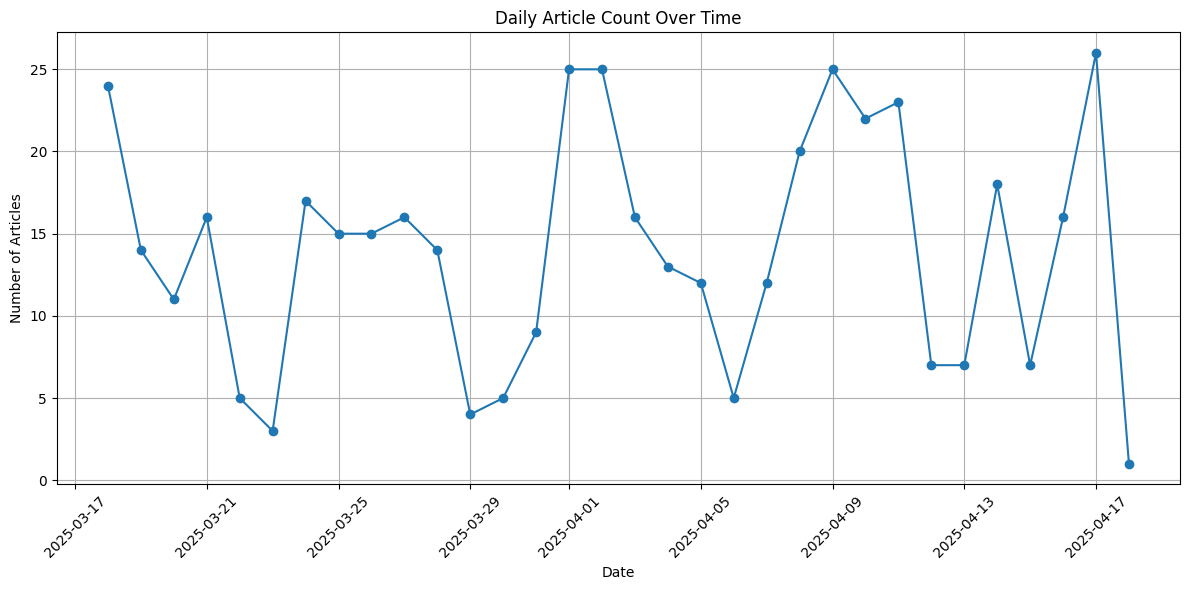

In [ ]:
# Convert 'publishedAt' to datetime
df["date"] = pd.to_datetime(df["published_at_clean"]).dt.date

date_counts = df["date"].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(date_counts.index, date_counts.values, marker="o", linestyle="-")
plt.title("Daily Article Count Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate text lengths


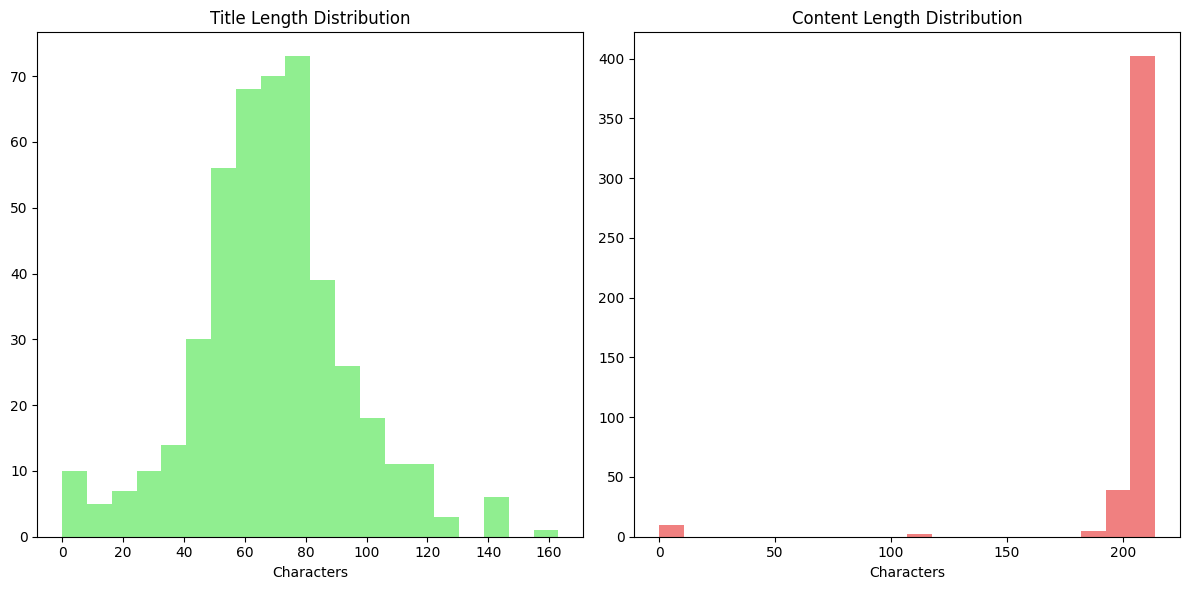

In [ ]:
df["title_length"] = df["title"].str.len()
df["content_length"] = df["content"].str.len()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df["title_length"], bins=20, color="lightgreen")
plt.title("Title Length Distribution")
plt.xlabel("Characters")

plt.subplot(1, 2, 2)
plt.hist(df["content_length"], bins=20, color="lightcoral")
plt.title("Content Length Distribution")
plt.xlabel("Characters")

plt.tight_layout()
plt.show()

# Lets go for something unique

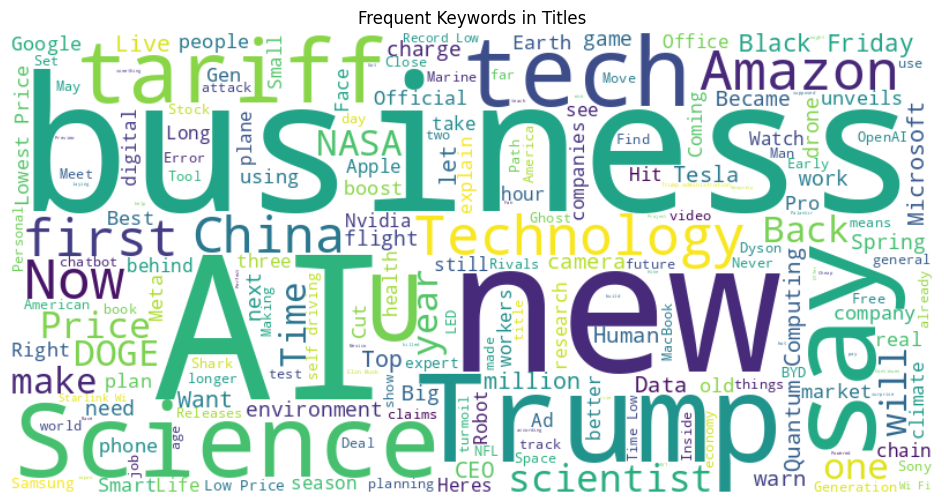

In [ ]:
from wordcloud import WordCloud

# Combine all titles into a single string
all_titles = " ".join(df["title"].dropna())

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Frequent Keywords in Titles")
plt.show()

#Missing values by column heatmap

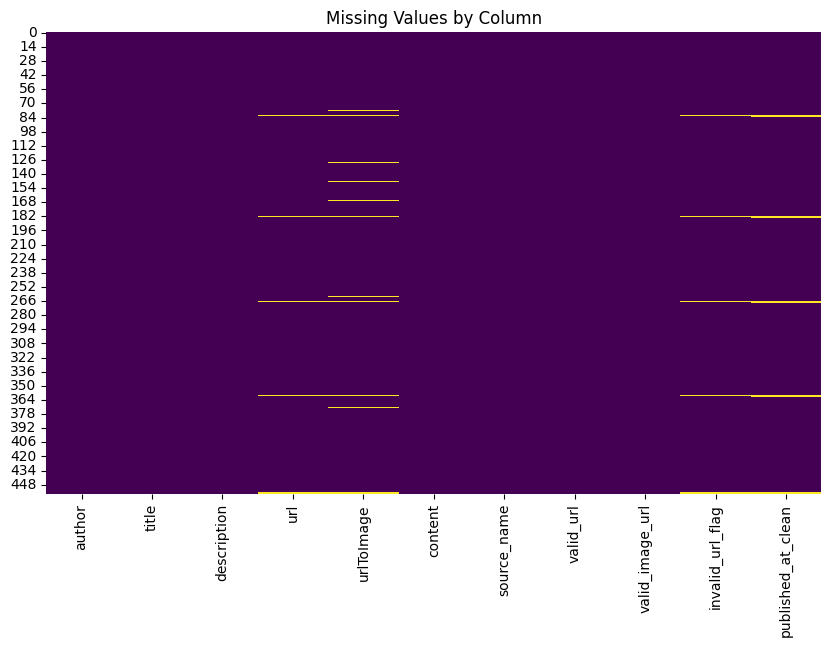

In [20]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values by Column")
plt.show()

# Top 10 Authors by Article Count

<ipython-input-21-8d43ed6c2360>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_authors.values, y=top_authors.index, palette="Blues_d")


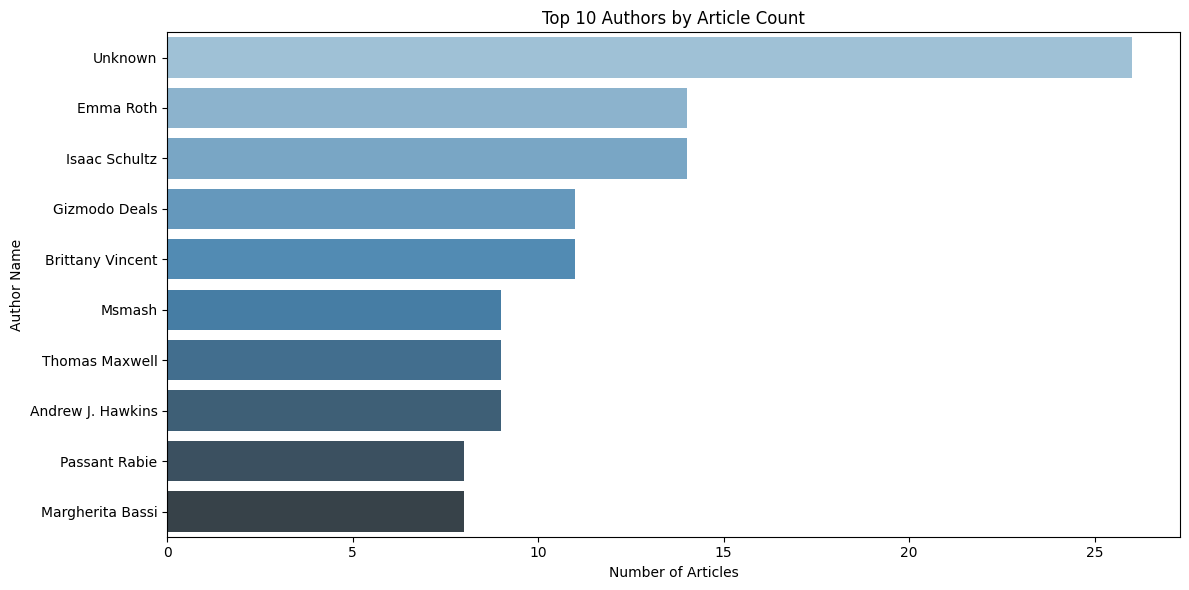

In [21]:
top_authors = df["author"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_authors.values, y=top_authors.index, palette="Blues_d")
plt.title("Top 10 Authors by Article Count")
plt.xlabel("Number of Articles")
plt.ylabel("Author Name")
plt.tight_layout()
plt.show()

#Content type Distribution

<ipython-input-64-d8f6254a47af>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["content_type"], palette="Pastel1")


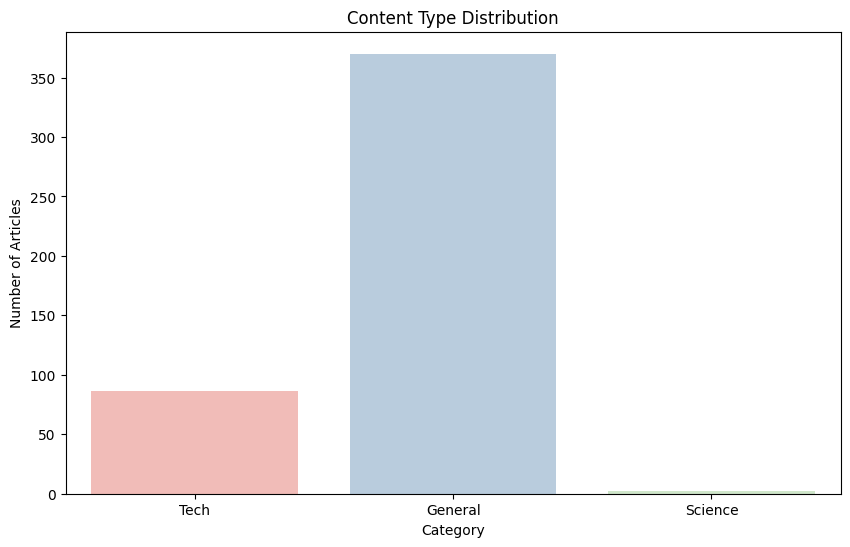

In [ ]:
# Manually categorize based on source names
df["content_type"] = df["source_name"].apply(
    lambda x: "Tech" if "Verge" in x else "Science" if "Scientist" in x else "General"
)

plt.figure(figsize=(10, 6))
sns.countplot(x=df["content_type"], palette="Pastel1")
plt.title("Content Type Distribution")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

#URL validity check

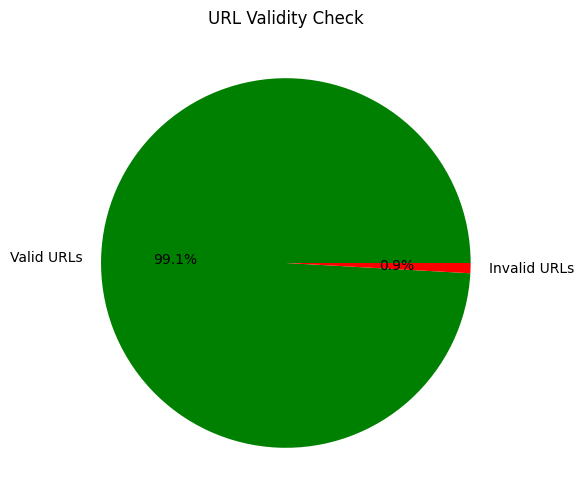

In [ ]:
valid_urls = df["invalid_url_flag"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(valid_urls,
        labels=["Valid URLs", "Invalid URLs"],
        autopct="%1.1f%%",
        colors=["green", "red"])
plt.title("URL Validity Check")
plt.show()